In [1]:
!pip install CFEDemands --upgrade

#uncomment if needed
#!pip install xarray
#!pip install dvc
#!pip install oauth2client

import xarray
import dvc
import oauth2client

Requirement already up-to-date: CFEDemands in /opt/conda/lib/python3.8/site-packages (0.2.7)


### From Sheet to DataFrame to Result Object

In [2]:
ICRISAT_Data = '1z35Kyga40hhoGBEQIY9jReY6z1wmnsnlUVw-pFEaBhg' #key matches the url of the google docs link above

In [3]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../Project2/')
from eep153_tools import read_sheets

#### Need private keys from json file (we're authenticating using "service accounts")
!gpg --batch --passphrase "noodle octopus" -d ../students-9093fa174318.json.gpg > ../students-9093fa174318.json
####

# Add credentials if sheet not meant to be public
x = read_sheets(ICRISAT_Data,sheet='Expenditures',json_creds='../students-9093fa174318.json')
                 
# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = read_sheets(ICRISAT_Data,sheet="HH Characteristics",json_creds='../students-9093fa174318.json')

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

gpg: AES256 encrypted data
gpg: encrypted with 1 passphrase


In [4]:
z.head()

,,,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log HSize
j,t,m,,,,,,,,,,,,,,,,,,,
100,2003,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1.791759
101,2003,1,0,0,2,1,0,2,1,0,0,1,1,1,1,0,2,1,0,1,2.639057
102,2003,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1.791759
103,2003,1,0,1,1,2,1,2,1,0,0,0,0,0,1,1,1,1,0,0,2.484907
105,2003,1,0,0,0,0,0,3,2,0,1,0,0,0,1,0,0,3,0,1,2.397895


In [5]:
z

,,,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log HSize
j,t,m,,,,,,,,,,,,,,,,,,,
100,2003,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1.791759
101,2003,1,0,0,2,1,0,2,1,0,0,1,1,1,1,0,2,1,0,1,2.639057
102,2003,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1.791759
103,2003,1,0,1,1,2,1,2,1,0,0,0,0,0,1,1,1,1,0,0,2.484907
105,2003,1,0,0,0,0,0,3,2,0,1,0,0,0,1,0,0,3,0,1,2.397895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2003,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1.386294
941,2003,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1.098612
95,2003,1,0,0,0,1,2,1,1,1,0,0,0,0,0,0,0,0,1,0,1.945910


In [6]:
y.head()

,,,Alcoholic drinks,Alugbati,Ampalaya,Atis,Atsal,Bagoong,Bamboo shoots,Banana,Beef,Birds,...,Soybean and other products,Squash,Sugar,Sweet potato,Talong,Tomatoes,Transfer of residence,Upo,"Vetsin, MSG",Vinegar
j,t,m,,,,,,,,,,,,,,,,,,,,,
2,2003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.688879,3.401197,NaN,...,2.302585,0.223144,3.258097,NaN,NaN,1.609438,NaN,NaN,1.609438,0.223144
4,2003,1,NaN,NaN,NaN,NaN,NaN,2.890372,NaN,NaN,3.314186,NaN,...,2.995732,1.609438,2.302585,NaN,NaN,2.302585,NaN,NaN,2.302585,0.000000
5,2003,1,3.091042,NaN,NaN,NaN,NaN,-0.287682,NaN,NaN,NaN,NaN,...,NaN,NaN,0.916291,NaN,NaN,1.791759,NaN,NaN,1.609438,0.223144
6,2003,1,NaN,NaN,2.302585,NaN,NaN,NaN,NaN,NaN,4.174387,NaN,...,2.708050,0.916291,2.890372,NaN,NaN,2.302585,NaN,NaN,0.223144,NaN
12,2003,1,NaN,NaN,1.609438,NaN,1.832581,NaN,NaN,NaN,NaN,NaN,...,1.945910,NaN,3.401197,3.044522,2.302585,1.609438,NaN,1.94591,2.995732,1.609438


## Estimation

In [7]:
import cfe

result = cfe.Result(y=y,z=z)

In [8]:
result

<xarray.Result>
Dimensions:           (i: 42, j: 572, k: 19, m: 1, t: 1)
Coordinates:
  * j                 (j) int64 2 4 5 6 12 13 14 ... 935 936 937 938 939 940 941
  * m                 (m) int64 1
  * t                 (t) int64 2003
  * i                 (i) <U45 'Alcoholic drinks' 'Ampalaya' ... 'Vinegar'
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log HSize'
Data variables:
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.792 1.386 1.099
    loglambdas        object None
    a                 object None
    yhat              object None
    ce                object None
    cehat             object None
    e                 object None
    delta_covariance  object None
    beta_covariance   object None
    se_delta          object None
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, m, t) float64 nan nan 3.091 ... -0.6931 1.946 2.996
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.792 1.386 1.099
Attributes:
    firstround:            2003
    min_proportion_items:  0.125
    min_xproducts:         30
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    verbose:               False

### First step of Estimation

Estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line and look at the estimated coefficients $\delta$:

In [9]:
result.get_reduced_form()

/opt/conda/lib/python3.8/site-packages/cfe/estimation.py:367: UserWarning: No variation in: (2003, 1)
  warnings.warn("No variation in: %s" % str(constant))
/opt/conda/lib/python3.8/site-packages/cfe/estimation.py:367: UserWarning: No variation in: (2003, 1)
  warnings.warn("No variation in: %s" % str(constant))
/opt/conda/lib/python3.8/site-packages/cfe/estimation.py:367: UserWarning: No variation in: (2003, 1)
  warnings.warn("No variation in: %s" % str(constant))
/opt/conda/lib/python3.8/site-packages/cfe/estimation.py:367: UserWarning: No variation in: (2003, 1)
  warnings.warn("No variation in: %s" % str(constant))
/opt/conda/lib/python3.8/site-packages/cfe/estimation.py:367: UserWarning: No variation in: (2003, 1)
  warnings.warn("No variation in: %s" % str(constant))
/opt/conda/lib/python3.8/site-packages/cfe/estimation.py:367: UserWarning: No variation in: (2003, 1)
  warnings.warn("No variation in: %s" % str(constant))
/opt/conda/lib/python3.8/site-packages/cfe/estimation.py:3

In [10]:
result.delta.to_dataframe().unstack('k')
# holding household size constant the numbers represent a percentage increase or decrease in household 
# expenditures of the item

delta              \
k                                             Females 0-1 Females 1-5   
i                                                                       
Alcoholic drinks                                -0.229230   -0.026475   
Ampalaya                                        -0.310872    0.169819   
Atsal                                            0.246878   -0.093379   
Bagoong                                         -0.311432   -0.024882   
Banana                                           0.118409    0.072187   
Beef                                             0.066491   -0.009593   
Calamansi                                        0.186709    0.073960   
Carrots                                          0.037546    0.013946   
Chicken                                         -0.302186   -0.352860   
Coffee                                          -0.029142    0.002722   
Coke                                             0.014610   -0.012935   
Cooking oil                                      0.010259   -0.168674   
Corn products                                   -1.046075    0.223242   
Dried fish and smoked fish                      -0.139872   -0.129660   
Eggs                                             0.084261    0.029775   
Food made from flour                             0.016886    0.106308   
Fresh fish                                       0.036888    0.034519   
Milk                                             0.454836    0.413555   
Milo                                            -0.082501    0.040696   
Mongo and other products                        -0.000962   -0.017632   
Okra                                             0.001174    0.234017   
Onions                                          -0.009465    0.006071   
Other beverages                                 -0.222810   -0.096414   
Petsay                                          -0.423402    0.037326   
Pork                                            -0.208672    0.092542   
Potato                                          -0.294192   -0.157375   
Processed meat like longanisa                   -0.033387    0.159841   
Rice                                             0.207261    0.071451   
Rice products                                    0.027039    0.031765   
Salt                                             0.209363   -0.007914   
Sardines like youngstown, etc                    0.018615    0.070375   
Sea weed                                        -0.937852    0.049253   
Sitao                                            0.268862   -0.037764   
Snaks like chippy, cheese curls, bread sticks    0.076018   -0.059136   
Soybean and other products                       0.013037    0.054587   
Squash                                          -0.220856    0.171372   
Sugar                                           -0.116699    0.128147   
Sweet potato                                    -0.523729    0.100649   
Talong                                          -0.129571    0.241133   
Tomatoes                                         0.054085    0.016633   
Vetsin, MSG                                      0.156050    0.046791   
Vinegar                                         -0.021601   -0.045639   

                                                                           \
k                                             Females 10-15 Females 15-20   
i                                                                           
Alcoholic drinks                                   0.081037     -0.104062   
Ampalaya                                           0.256434      0.188770   
Atsal                                             -0.007398     -0.032146   
Bagoong                                            0.038794      0.089662   
Banana                                             0.071651      0.102375   
Beef                                              -0.032711      0.098828   
Calamansi                                          0.207899     -0.020976

Also the good-time constants $a_{it}$ (this captures the effects of prices)

In [11]:
result.a.to_dataframe().unstack('i') # bigger the number the biggerr the demand for the good

a                                                   \
i      Alcoholic drinks Ampalaya     Atsal   Bagoong    Banana      Beef   
t    m                                                                     
2003 1         2.667633  2.49471  1.643557  1.038494  2.579405  3.403645   

                                                ...            \
i      Calamansi   Carrots   Chicken    Coffee  ...     Sitao   
t    m                                          ...             
2003 1  1.448823  1.484986  2.407365  2.175999  ...  1.362162   

                                                      \
i      Snaks like chippy, cheese curls, bread sticks   
t    m                                                 
2003 1                                      0.037173   

                                                                              \
i      Soybean and other products    Squash     Sugar Sweet potato    Talong   
t    m                                                                         
2003 1                   2.044112  2.006581  2.332593     2.084173  1.778438   

                                        
i       Tomatoes Vetsin, MSG   Vinegar  
t    m                                  
2003 1  1.720865    1.308317  0.357919  

[1 rows x 42 columns]

### Second step of Estimation

The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:


In [12]:
result.get_beta(as_df=True) # higher the number the higher the income elasticity of the good

i
Alcoholic drinks                                 0.350288
Ampalaya                                         0.454768
Atsal                                            0.528102
Bagoong                                          0.256952
Banana                                           0.525025
Beef                                             0.420855
Calamansi                                        0.564108
Carrots                                          0.388565
Chicken                                          0.482023
Coffee                                           0.395031
Coke                                             0.448178
Cooking oil                                      0.437053
Corn products                                    0.361899
Dried fish and smoked fish                       0.309588
Eggs                                             0.506183
Food made from flour                             0.388270
Fresh fish                                       0.520491
Milk        

We can also look at the results to analyze for goods that didn't have enough observations:

In [13]:
result.get_alpha(as_df=True)

i
Alcoholic drinks                                 2.667633
Ampalaya                                         2.494710
Atsal                                            1.643557
Bagoong                                          1.038494
Banana                                           2.579405
Beef                                             3.403645
Calamansi                                        1.448823
Carrots                                          1.484986
Chicken                                          2.407365
Coffee                                           2.175999
Coke                                             3.167337
Cooking oil                                      2.312384
Corn products                                    0.851213
Dried fish and smoked fish                       2.386023
Eggs                                             2.704676
Food made from flour                             3.053415
Fresh fish                                       3.402977
Milk        

### Assessment of Fit

Comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:

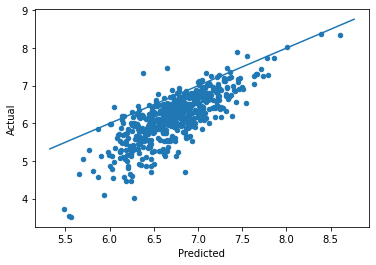

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax]);

### Saving Result

In [15]:
# again, uncomment if necessary
# !pip install h5netcdf

In [16]:
result.to_dataset('icrisat.ds')

ModuleNotFoundError: No module named 'h5netcdf'